<a href="https://colab.research.google.com/github/Vaishnviii2904/Plant_Disease_Detection/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 98% 2.63G/2.70G [00:20<00:01, 40.2MB/s]
100% 2.70G/2.70G [00:20<00:00, 143MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Traing Image Preprocessing**

In [5]:
#Trainig Image-Preprocessing (38-class Problem)

training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


**Validation Image** **Preprocessing**


In [6]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[175.   184.   183.  ]
   [176.   185.   184.  ]
   [177.   186.   185.  ]
   ...
   [149.   155.   155.  ]
   [148.5  154.5  154.5 ]
   [149.5  155.5  155.5 ]]

  [[175.   184.   183.  ]
   [176.   185.   184.  ]
   [176.25 185.25 184.25]
   ...
   [153.25 159.25 159.25]
   [152.25 158.25 158.25]
   [150.25 156.25 156.25]]

  [[176.   185.   184.  ]
   [175.   184.   183.  ]
   [174.75 183.75 182.75]
   ...
   [151.75 157.75 157.75]
   [151.   157.   157.  ]
   [148.5  154.5  154.5 ]]

  ...

  [[106.75 115.75 114.75]
   [ 95.75 104.75 103.75]
   [102.5  111.5  110.5 ]
   ...
   [ 51.    60.    59.  ]
   [ 54.75  63.75  62.75]
   [ 50.75  59.75  58.75]]

  [[ 97.75 106.75 105.75]
   [ 98.75 107.75 106.75]
   [ 99.25 108.25 107.25]
   ...
   [ 51.25  60.25  59.25]
   [ 58.5   67.5   66.5 ]
   [ 55.25  64.25  63.25]]

  [[107.75 116.75 115.75]
   [ 96.25 105.25 104.25]
   [ 99.75 108.75 107.75]
   ...
   [ 49.75  58.75  57.75]
   [ 53.75  62.75  61.75]
   [ 58.25  67.25  6

**Building Model**

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
#Building Convolutiion Layer

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=38,activation='softmax')) #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [14]:
training_history=model.fit(training_set,epochs=10,validation_data=validation_set)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 156s 65ms/step - accuracy: 0.4135 - loss: 2.0694 - val_accuracy: 0.8187 - val_loss: 0.5803
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.8358 - loss: 0.5153 - val_accuracy: 0.9138 - val_loss: 0.2692
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.9070 - loss: 0.2861 - val_accuracy: 0.9325 - val_loss: 0.1963
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - accuracy: 0.9372 - loss: 0.1900 - val_accuracy: 0.9340 - val_loss: 0.2104
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 65ms/step - accuracy: 0.9531 - loss: 0.1415 - val_accuracy: 0.9487 - val_loss: 0.1559
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9629 - loss: 0.1124 - val_accuracy: 0.9508 - val_loss: 0.1603
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9718 - loss: 0.0872 - val_accuracy: 0.9529 - val_loss: 0.1498
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 

In [15]:
#Problem of overshooting loss function
# reason- high learning rate- choose small learning rate
# There may be a chance of underfitting- increase number of neuron
# To avoid underfitting add more conv2dlayer to extract more features



**Model Evaluation**

In [16]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.9842 - loss: 0.0478


In [17]:
print(train_loss,train_acc)

0.04495881870388985 0.9851198792457581


In [18]:
val_loss,val_accuracy=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9586 - loss: 0.1357


In [19]:
print(val_loss,val_accuracy)

0.13694152235984802 0.9575461149215698


In [20]:
#saving model
model.save('plant_disease_model.h5')

In [21]:
model.save('plant_disease_model.keras')

In [22]:
training_history.history

{'accuracy': [0.6114517450332642,
  0.8619958758354187,
  0.9155985713005066,
  0.9424283504486084,
  0.9557294249534607,
  0.9661995768547058,
  0.9729568362236023,
  0.9763994812965393,
  0.9799700975418091,
  0.9829575419425964],
 'loss': [1.3152395486831665,
  0.4312109351158142,
  0.2596619725227356,
  0.17557236552238464,
  0.13232730329036713,
  0.10255935788154602,
  0.084048792719841,
  0.07198648154735565,
  0.061106305569410324,
  0.0543278232216835],
 'val_accuracy': [0.8187457323074341,
  0.9137833118438721,
  0.932506263256073,
  0.9339858889579773,
  0.948668360710144,
  0.95083087682724,
  0.9529364705085754,
  0.9674482345581055,
  0.9726837873458862,
  0.9575461149215698],
 'val_loss': [0.5803177356719971,
  0.2691918611526489,
  0.19628353416919708,
  0.21035417914390564,
  0.15587416291236877,
  0.16028611361980438,
  0.14976803958415985,
  0.10949010401964188,
  0.09333192557096481,
  0.13694150745868683]}

In [23]:
#Recording History in JSON
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)


**Accuracy Visualisation**

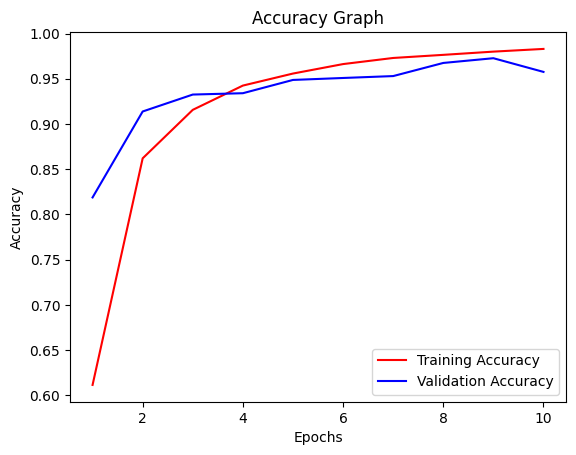

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],label='Training Accuracy',color='red')
plt.plot(epochs,training_history.history['val_accuracy'],label='Validation Accuracy',color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

In [25]:
#Some other metrics for evaluation
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [26]:
test_set =tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [27]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step


(array([[9.9999976e-01, 1.1704828e-07, 5.6700507e-09, ..., 1.9537423e-14,
         6.6440573e-14, 9.6274849e-14],
        [9.9999368e-01, 2.9441168e-07, 8.4684448e-10, ..., 4.1762722e-13,
         4.5518938e-13, 1.1329010e-12],
        [1.0000000e+00, 4.1505205e-10, 9.8998362e-12, ..., 6.5397628e-19,
         8.9018173e-17, 8.6972692e-16],
        ...,
        [1.9219362e-06, 3.4032323e-07, 1.2804693e-05, ..., 4.1185280e-07,
         1.8304140e-06, 9.9892163e-01],
        [6.0162643e-07, 1.4264466e-08, 3.6748099e-06, ..., 3.8259287e-07,
         5.4751342e-07, 9.9984384e-01],
        [7.6879405e-13, 1.9642835e-14, 1.7374338e-13, ..., 9.0010952e-14,
         2.1093141e-11, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [28]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [29]:
true_category=tf.concat([y for x, y in test_set], axis=0)
true_category

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [30]:
y_true=tf.argmax(true_category, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
classification_report=classification_report(y_true,predicted_categories)
print(classification_report)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       504
           1       0.94      0.99      0.97       497
           2       0.96      0.98      0.97       440
           3       0.92      0.96      0.94       502
           4       0.92      0.99      0.95       454
           5       1.00      0.97      0.98       421
           6       1.00      0.97      0.99       456
           7       0.85      0.98      0.91       410
           8       0.98      0.99      0.99       477
           9       0.99      0.87      0.93       477
          10       0.99      1.00      0.99       465
          11       0.97      0.98      0.97       472
          12       1.00      0.96      0.98       480
          13       0.98      1.00      0.99       430
          14       0.99      1.00      0.99       423
          15       0.99      0.98      0.99       503
          16       0.95      0.96      0.95       459
          17       0.97    

In [33]:
cn=confusion_matrix(y_true,predicted_categories)
cn,cn.shape

(array([[495,   1,   0, ...,   0,   0,   0],
        [  1, 494,   0, ...,   0,   0,   0],
        [  1,   0, 432, ...,   0,   0,   1],
        ...,
        [  0,   0,   1, ..., 454,   0,   0],
        [  0,   0,   0, ...,   0, 446,   0],
        [  4,   0,   1, ...,   0,   0, 474]]),
 (38, 38))

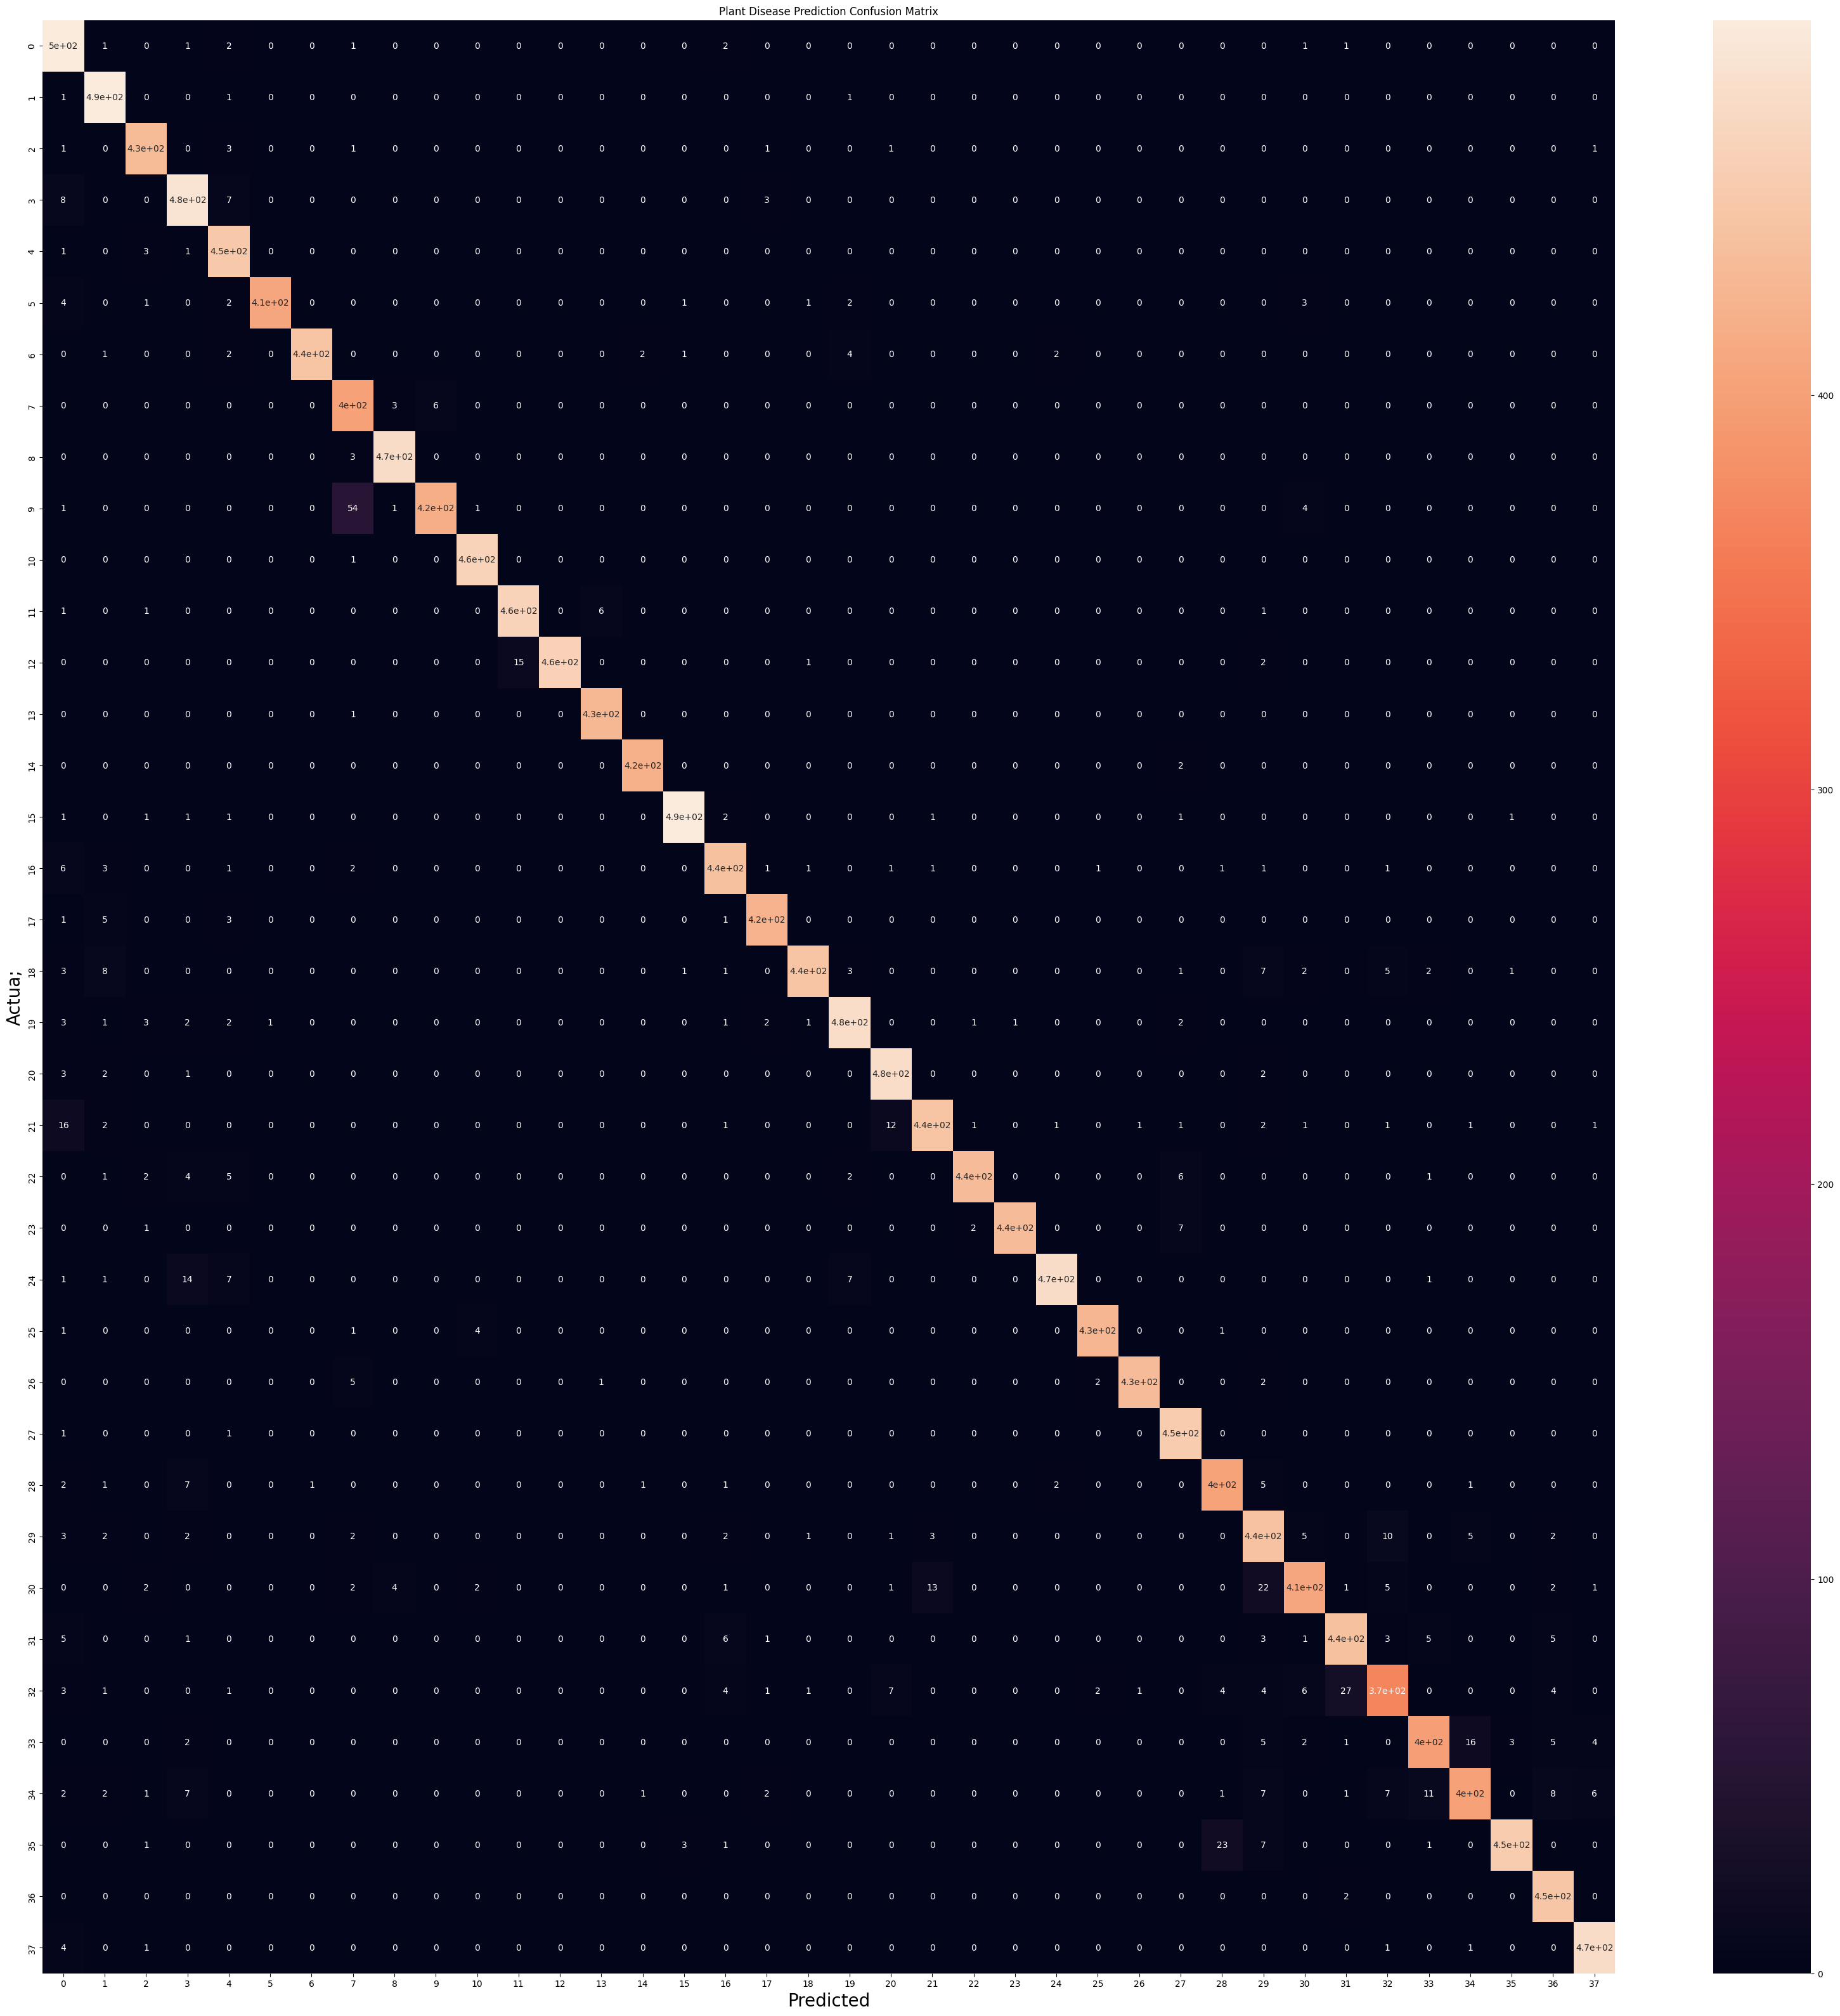

In [34]:
#confusion matrix visualisation
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True,annot_kws={'size':10})
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actua;',fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix')
plt.show()

***TESTING MODEL***

In [35]:
model=tf.keras.models.load_model('/content/plant_disease_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,685,526 (59.84 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,842,764 (29.92 MB)

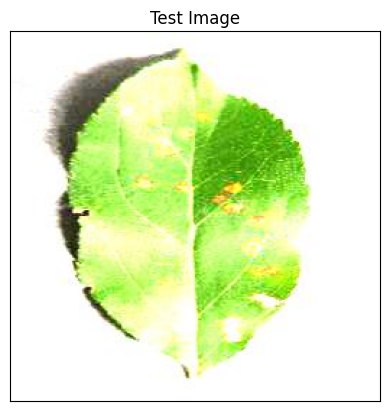

In [40]:
#Visualizing single image of test
import cv2
image_path="/content/test/test/AppleCedarRust1.JPG"

#Reading Image
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Displaying Image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [43]:
#Testing Model
#Step1: Convert Image to Array
import numpy as np

img=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_array=tf.keras.preprocessing.image.img_to_array(img)
input_array=np.array([input_array/255]) #Converting Single Image to batch

print(input_array.shape)

(1, 128, 128, 3)


In [46]:
prediction=model.predict(input_array)
print(prediction,prediction.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[0.02743095 0.00877758 0.02454654 0.04279792 0.01293188 0.04636946
  0.00780469 0.09138109 0.02021483 0.05352295 0.08371838 0.01139556
  0.012855   0.01039545 0.01149183 0.03189977 0.03023325 0.01315081
  0.00962799 0.0140772  0.00770412 0.02361798 0.01220194 0.00974323
  0.01244332 0.06747119 0.01141729 0.00698487 0.02754739 0.03528213
  0.11995735 0.01560303 0.00913697 0.01286477 0.01245483 0.0245184
  0.0090001  0.01742801]] (1, 38)


In [48]:
result_index = np.argmax(prediction)
print(result_index)

30


In [49]:
class_name=test_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

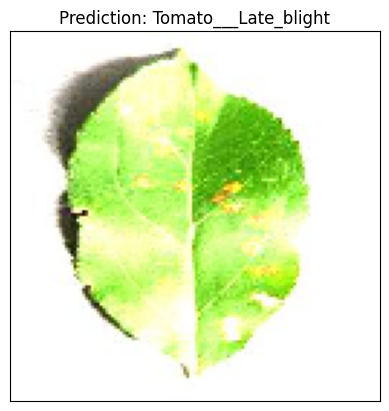

In [51]:
#Displaying result of disease prediction
model_prediction=class_name[result_index]
plt.imshow(img)
plt.title(f'Prediction: {model_prediction}')
plt.xticks([])
plt.yticks([])
plt.show()
